# Analysis for Barcelona Hotels Price and score

In [76]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("datos.csv")
df

,name,price,score
0,H10 Universitat,306,8.5
1,Sixtytwo Hotel,261,9.3
2,NH Collection Barcelona Constanza,381,8.9
3,H10 Casanova,184,8.8
4,Acta Voraport,273,9.0
...,...,...,...
512,Pensión Portugal,84,6.4
513,Hotel Suizo,4727,8.4
514,Hotel Del Mar,205,8.3
515,Alba Hotel,279,7.6


In [78]:
df.describe()

,price,score
count,517.000000,517.000000
mean,282.444874,8.435203
std,230.539575,0.826146
min,84.000000,4.400000
25%,199.000000,8.000000
50%,238.000000,8.600000
75%,310.000000,9.000000
max,4727.000000,9.800000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    517 non-null    object 
 1   price   517 non-null    int64  
 2   score   517 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ KB


In [80]:
df.dtypes

name      object
price      int64
score    float64
dtype: object

In [85]:
df_filtered = df.query('price <= 310')

In [86]:
df
df['price_range'] = pd.cut(df['price'], bins=10)
data = df.groupby("price_range", observed=False)["name"].count().reset_index()
data.columns = ['price_range', 'count']
data['price_range'] = data['price_range'].astype(str)
data

,price_range,count
0,"(79.357, 548.3]",500
1,"(548.3, 1012.6]",15
2,"(1012.6, 1476.9]",1
3,"(1476.9, 1941.2]",0
4,"(1941.2, 2405.5]",0
5,"(2405.5, 2869.8]",0
6,"(2869.8, 3334.1]",0
7,"(3334.1, 3798.4]",0
8,"(3798.4, 4262.7]",0
9,"(4262.7, 4727.0]",1


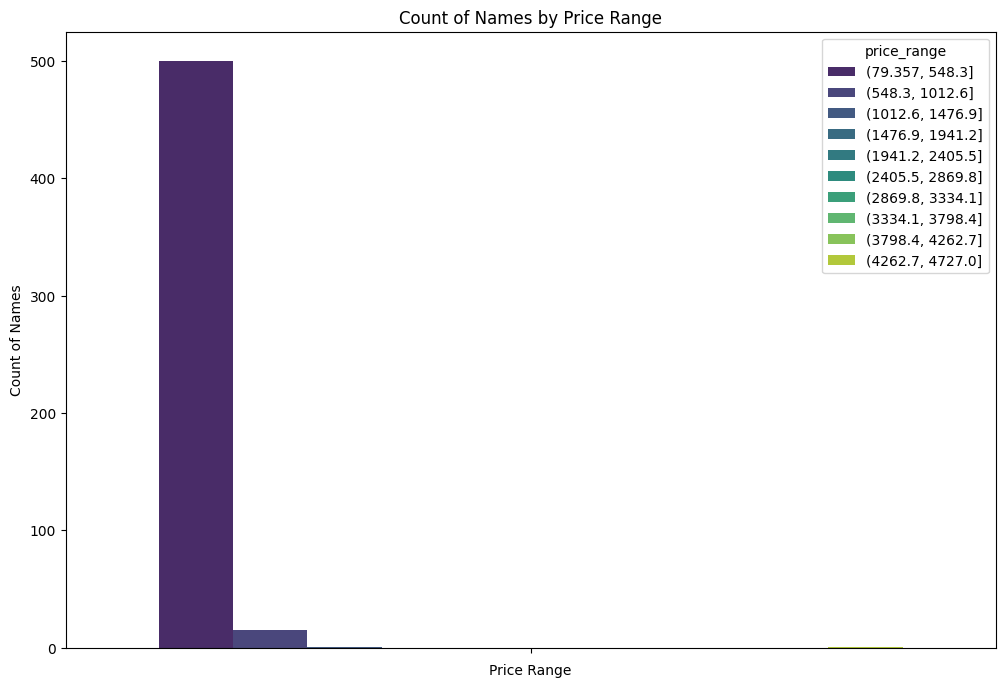

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(hue='price_range', y='count', data=data, palette='viridis')

plt.xlabel('Price Range')
plt.ylabel('Count of Names')
plt.title('Count of Names by Price Range')

plt.xticks(rotation=90)

plt.show()

In [88]:
df_filtered['price_range'] = pd.cut(df_filtered['price'], bins=10)
data = df_filtered.groupby("price_range", observed=False)["name"].count().reset_index()
data.columns = ['price_range', 'count']
data['price_range'] = data['price_range'].astype(str)
data

/tmp/ipykernel_51122/1787032734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price_range'] = pd.cut(df_filtered['price'], bins=10)


,price_range,count
0,"(83.774, 106.6]",4
1,"(106.6, 129.2]",2
2,"(129.2, 151.8]",9
3,"(151.8, 174.4]",42
4,"(174.4, 197.0]",68
5,"(197.0, 219.6]",65
6,"(219.6, 242.2]",82
7,"(242.2, 264.8]",37
8,"(264.8, 287.4]",40
9,"(287.4, 310.0]",40


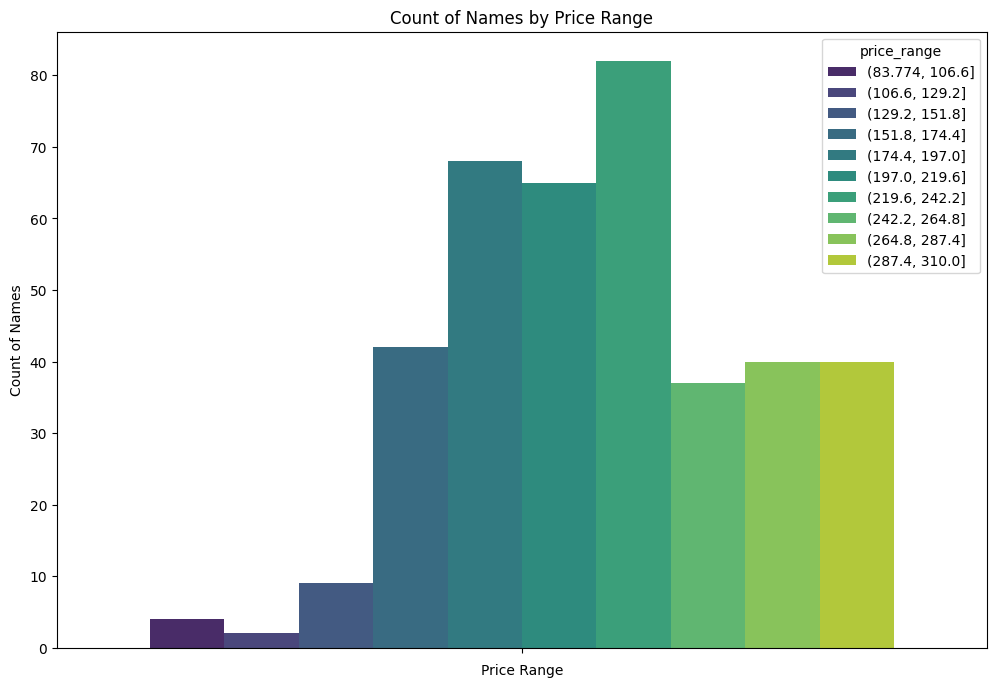

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(hue='price_range', y='count', data=data, palette='viridis')

plt.xlabel('Price Range')
plt.ylabel('Count of Names')
plt.title('Count of Names by Price Range')

plt.xticks(rotation=90)

plt.show()

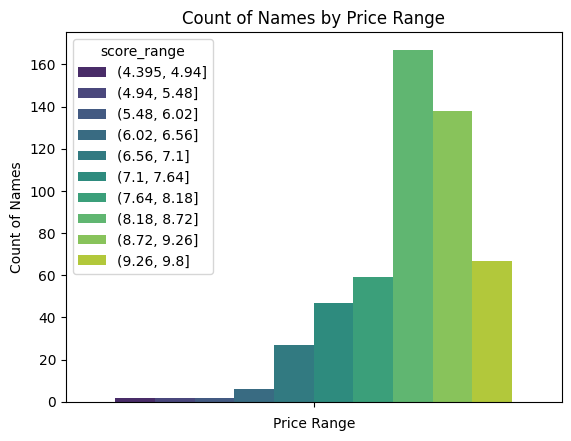

In [102]:
df["score_range"] = pd.cut(df['score'], bins=10)
data = df.groupby("score_range", observed=False)["name"].count().reset_index()
data.columns = ['score_range', 'count']
data['score_range'] = data['score_range'].astype(str)

sns.barplot(hue='score_range', y='count', data=data, palette='viridis')

plt.xlabel('Price Range')
plt.ylabel('Count of Names')
plt.title('Count of Names by Price Range')

plt.xticks(rotation=90)

plt.show()

/tmp/ipykernel_51122/4049307317.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filtered.pivot_table(index='price_range', columns='score', aggfunc='size')


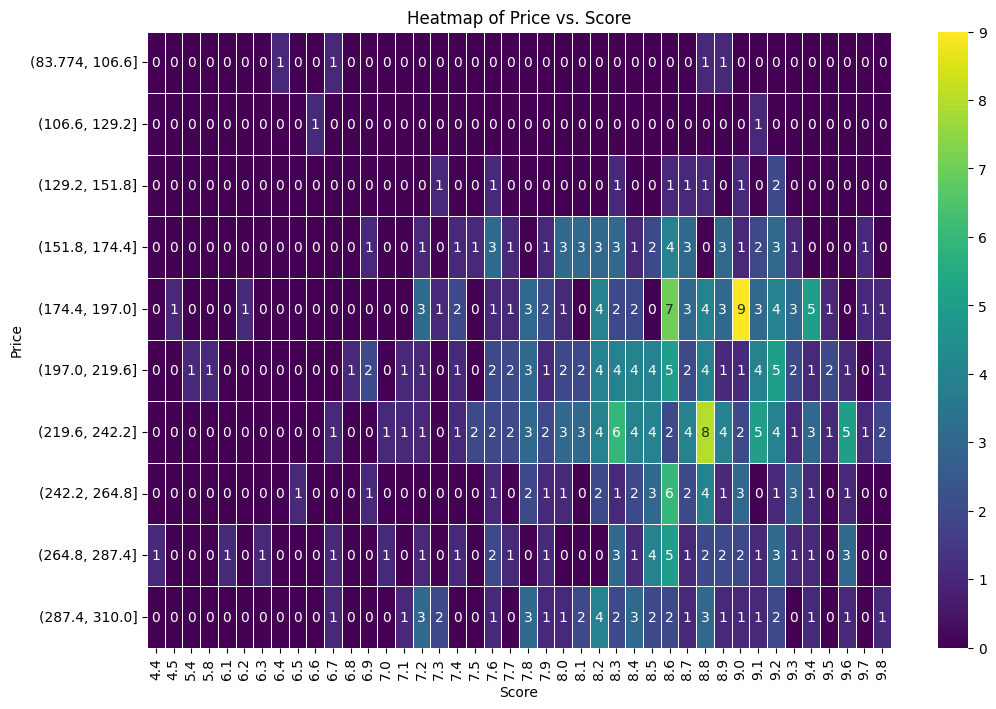

In [91]:
# Crear un heatmap relacionando price y score
heatmap_data = df_filtered.pivot_table(index='price_range', columns='score', aggfunc='size')

# Trazar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=0.5)

# Configurar el título y las etiquetas de los ejes
plt.title('Heatmap of Price vs. Score')
plt.xlabel('Score')
plt.ylabel('Price')

# Mostrar el heatmap
plt.show()